# 🚗  `Car Price Prediction`
---------------

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
df_org = pd.read_csv(r"/content/ford.csv")
df = df_org.copy()

# EDA -Exploratory Data Analysis


DataSet - Ford Cars Info

    Attribute Information:
    1.model - > Ford Car Brands
    2.year - >Production Year
    3.price - >Price of car in $
    4.transmission - > Automatic,Manual, Semi-Auto
    5.mileage -> Number of miles traveled
    6.fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other
    7.tax -> Annual Tax
    8.mpg - > Miles per Gallon
    9.engineSize - > Car's Engine Size

In [ ]:
df.sample(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5315,EcoSport,2015,7030,Manual,57455,Petrol,125,53.3,1.0
7882,Fiesta,2016,10137,Manual,22856,Diesel,0,78.5,1.5
11775,Fiesta,2018,10990,Manual,9798,Petrol,150,65.7,1.0
4296,S-MAX,2017,18298,Semi-Auto,12232,Diesel,125,52.3,2.0
92,Fiesta,2017,9895,Manual,19079,Petrol,145,65.7,1.0
3722,C-MAX,2016,9450,Manual,39360,Diesel,30,64.2,2.0
13414,Kuga,2019,20000,Manual,2000,Diesel,150,47.9,2.0
9184,EcoSport,2019,17600,Semi-Auto,2014,Petrol,145,45.6,1.0
10744,Focus,2016,14499,Manual,40953,Diesel,20,67.3,2.0
10556,Fiesta,2018,11000,Manual,16301,Petrol,145,56.5,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


# Visualization of the Distribution

### Numerical Value

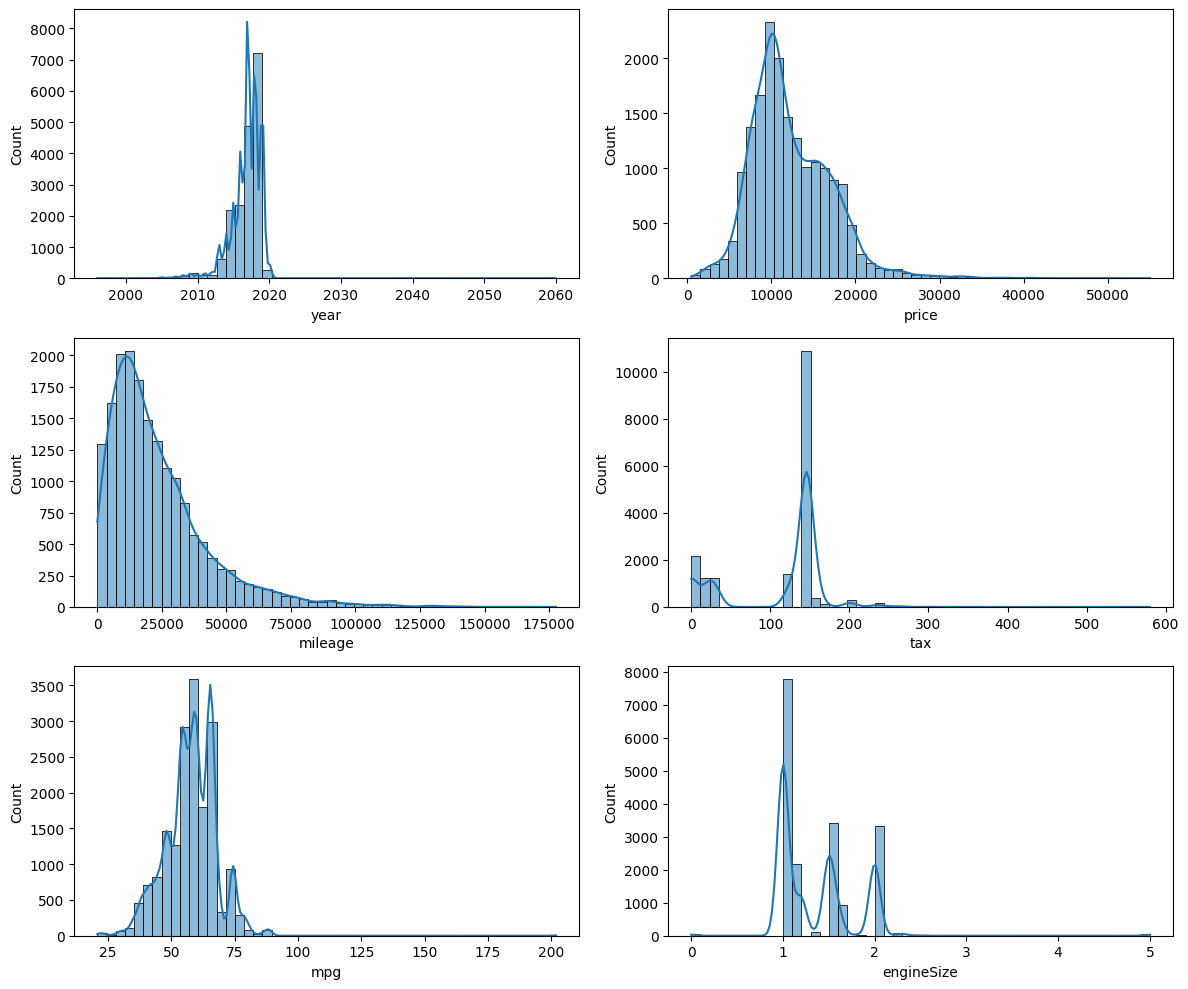

In [ ]:
num_col = df.describe().columns

fig, axes = plt.subplots(3, 2, figsize=(12,10))
axes = axes.flatten()  # Flatten to 1D for easier indexing

# Plot histograms with Seaborn
for i, column in enumerate(num_col):
    sns.histplot(df[column], ax=axes[i], bins=50, kde=True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

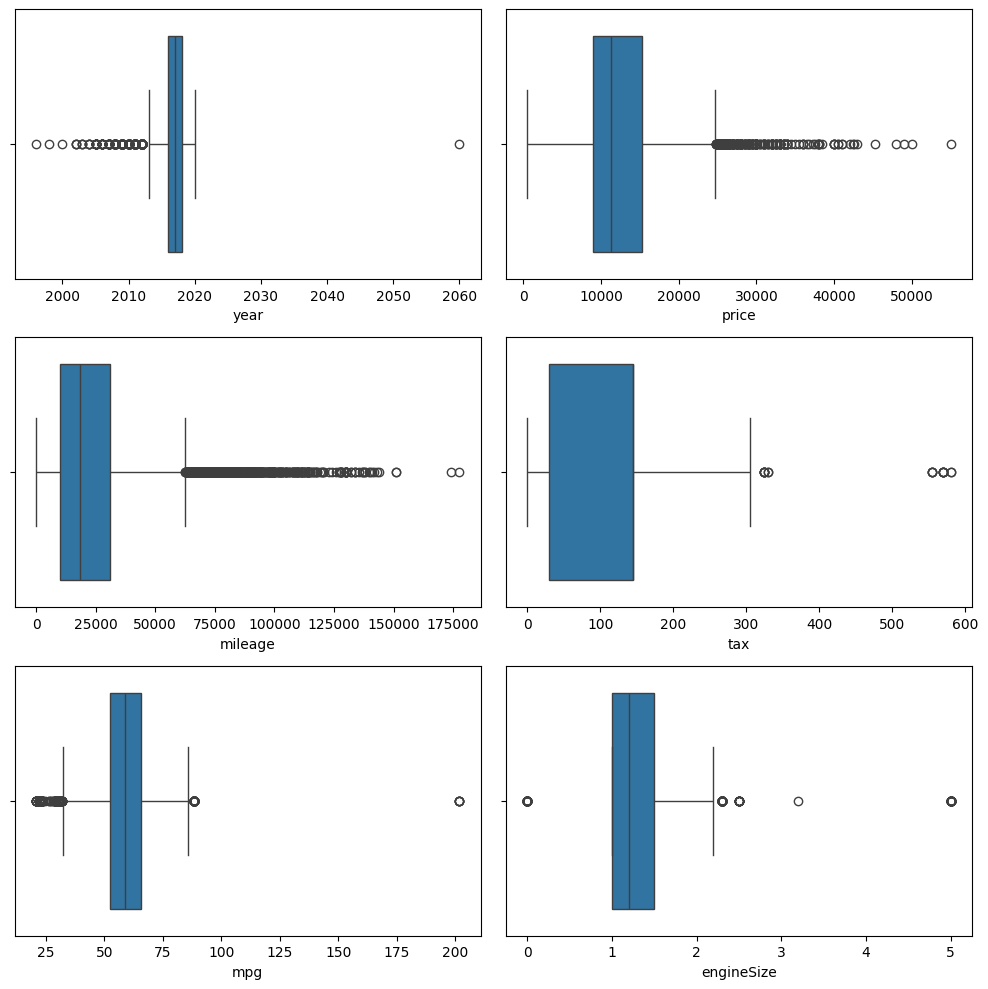

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
axes = axes.flatten()  # Flatten to 1D for easier indexing

# Plot boxplot with Seaborn
for i, column in enumerate(num_col):
    sns.boxplot(x=df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

### `Correlation`

<Axes: >

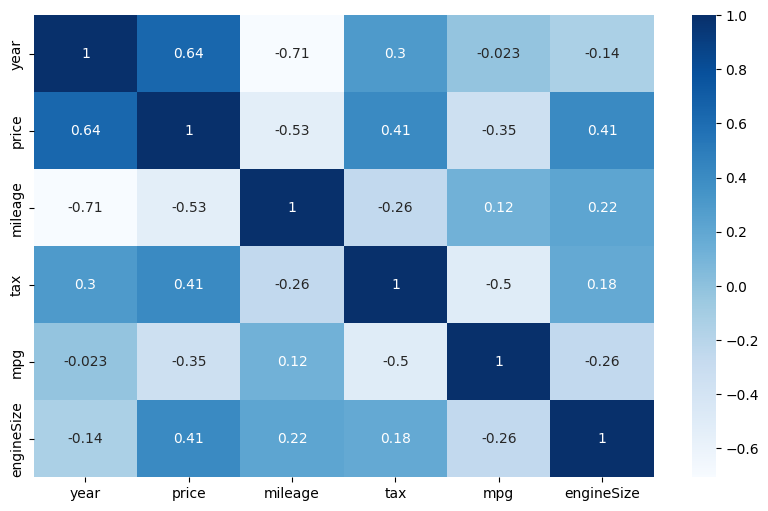

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

## Insight - Selecting Related Numerical Column to Price

        model
        year---------------- use
        transmission
        mileage ------------ use ( it relates to engineSize)
        fuelType
        tax----------------- use
        mpg
        engineSize---------- use

### Categorical Data

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


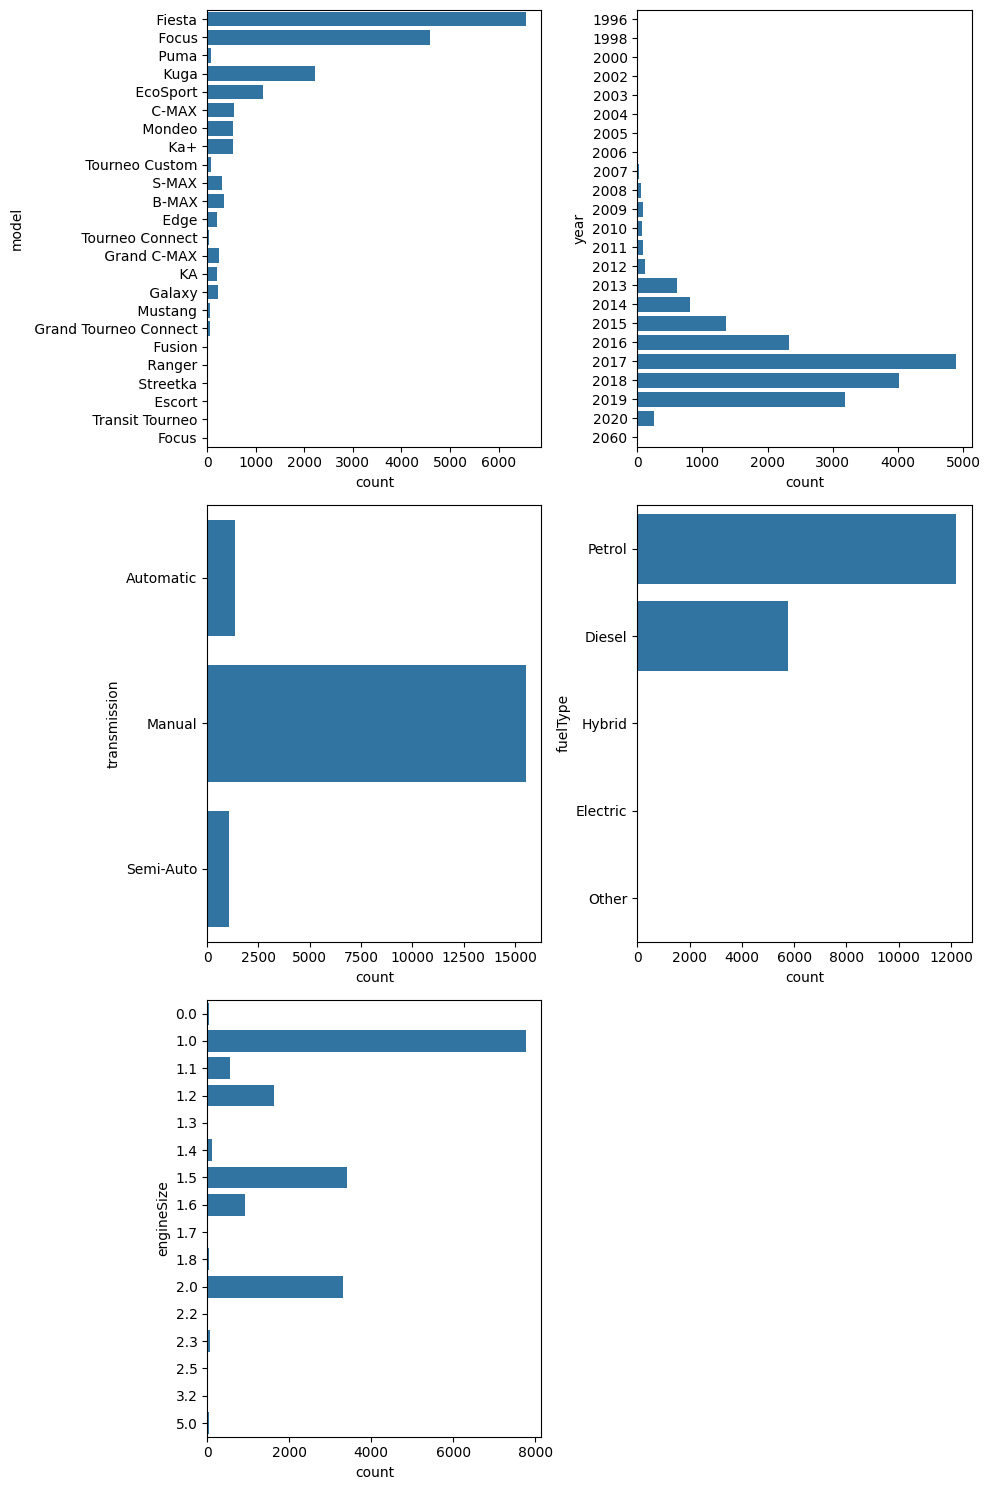

In [ ]:
cat_col = ['model','year','transmission','fuelType','engineSize']
fig, axes = plt.subplots(3, 2, figsize=(10,15))
axes = axes.flatten()  # Flatten to 1D for easier indexing

# Plot countplot with Seaborn
for i, column in enumerate(cat_col):
    sns.countplot(y=df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


### Finding the relationship of price with three categorical feature

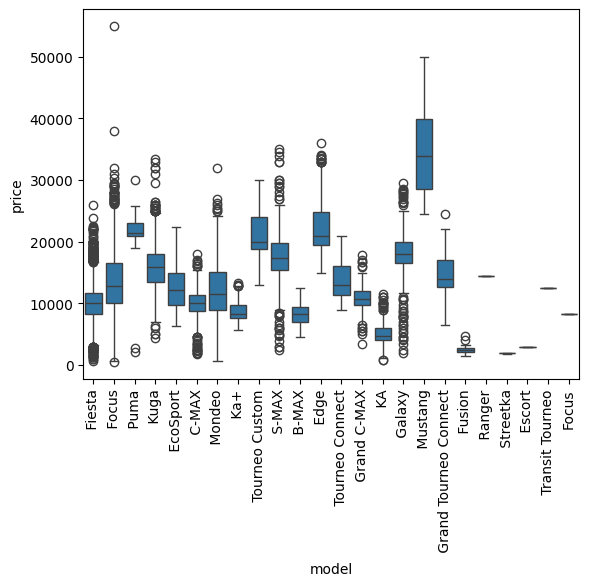

In [ ]:
sns.boxplot(x = 'model', y = 'price',data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='fuelType', ylabel='price'>

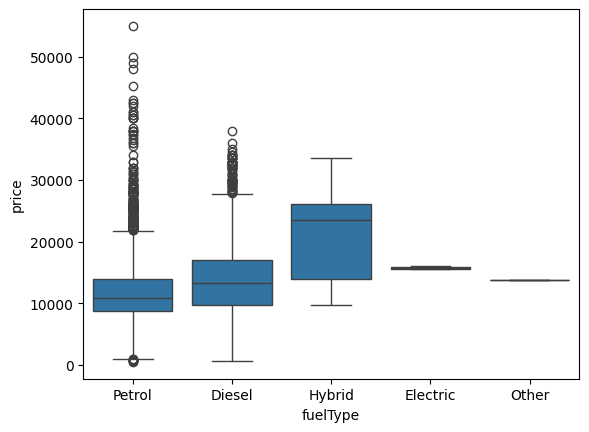

In [ ]:
sns.boxplot(x = 'fuelType', y = 'price',data=df)

<Axes: xlabel='transmission', ylabel='price'>

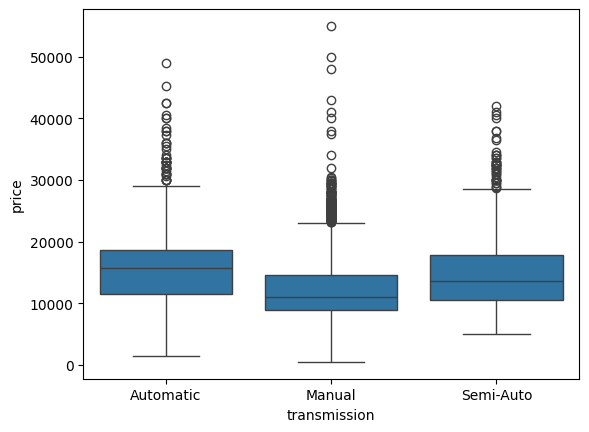

In [ ]:
sns.boxplot(x = 'transmission', y = 'price',data=df)

## Insight - Selecting Related Categorical Column to Price

        model >>>>>>>>>>>>>> use
        year---------------- use
        transmission
        mileage ------------ use ( it relates to engineSize)
        fuelType >>>>>>>>>>> use
        tax----------------- use
        mpg
        engineSize---------- use

# **Feature Engineering**




In [ ]:
x = df.drop(columns= ['price'],axis=1)
y = df['price']

In [ ]:
x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
y.head()

,price
0,12000
1,14000
2,13000
3,17500
4,16500


We are going to check which data would be more useful


One Hot Encoding or  Label Encoding

In [ ]:
# one hot encode to categorical features

x_one_encode = pd.get_dummies(x, columns=['model','transmission','fuelType'])

In [ ]:
x_one_encode.head()

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
x_one_encode =  x_one_encode.astype(int)
x_one_encode.head()

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['model','transmission','fuelType']

xlabel = x.copy()

for col in columns:
    xlabel[col] = le.fit_transform(xlabel[col])

xlabel.sample(5)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4882,5,2016,1,19141,4,0,65.7,1.0
11951,5,2019,1,3440,4,150,56.5,1.0
4425,6,2017,1,35450,4,145,60.1,1.0
13593,5,2009,0,39000,4,200,43.4,1.4
8798,5,2019,1,1559,4,145,48.7,1.1


# Standard Scaling

In [ ]:
# first scale all the numerical columns of x_one_encode

numerical_col = ['year','mileage', 'tax', 'mpg']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_one_encode[numerical_col] = scaler.fit_transform(x_one_encode[numerical_col])

x_one_encode.head()

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
#  second - use standard scaling at x label encoding data

xlabel[xlabel.columns] = scaler.fit_transform(xlabel[xlabel.columns])
xlabel.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386


# Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# train test
x_train, x_test, y_train, y_test = train_test_split(x_one_encode, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head(10)

,Actual,Predicted
17610,6995,6866.358076
7076,8999,9347.681013
1713,7998,9362.183208
1611,5491,4547.627872
16830,3790,2211.832724
14735,18200,16992.745265
322,22998,30104.342353
8164,11000,12529.164369
6822,7600,11344.540890
2133,14985,17300.203809


In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2*100)

84.64177711972798


In [ ]:
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adj_r2*100)

84.4819755880716


# Model 2 - Using Label Encode

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xlabel, y, test_size=0.2, random_state=42)

In [ ]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head(10)

,Actual,Predicted
17610,6995,6152.075677
7076,8999,9374.391344
1713,7998,9464.922643
1611,5491,4598.461319
16830,3790,3495.610912
14735,18200,15303.496728
322,22998,20374.247309
8164,11000,12631.252469
6822,7600,12297.797651
2133,14985,17229.834384


In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2*100)

73.65884288851352


In [ ]:
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adj_r2*100)

73.60006206371801
